# torch.nn

Containers

Convolution Layers

Pooling layers

Padding Layers

Non-linear Activations (weighted sum, nonlinearity)

Non-linear Activations (other)

Normalization Layers

Recurrent Layers

Transformer Layers

Linear Layers

Dropout Layers

Sparse Layers

Distance Functions

Loss Functions

Vision Layers

Shuffle Layers

DataParallel Layers (multi-GPU, distributed)

Utilities

Quantized Functions

Lazy Modules Initialization

In [1]:
import torch
print(torch.__version__)

1.10.0+cu111


In [2]:
import numpy as np
print(np.version.version)

1.19.5


In [3]:
def prop(t):
    print("dim->>{} : shape->>{} : dtype->>{} : GPU->>{} : Type-->{}".format(t.ndim, t.shape, t.dtype, t.is_cuda, type(t)))

In [4]:
x = torch.tensor([5])
prop(x)

dim->>1 : shape->>torch.Size([1]) : dtype->>torch.int64 : GPU->>False : Type--><class 'torch.Tensor'>


## Autograd

In [46]:
# Create an example tensor
# requires_grad parameter tells PyTorch to store gradients
x = torch.tensor([2.], requires_grad=True)

# Print the gradient if it is calculated
# Currently None since x is a scalar
print(x.grad)

None


In [47]:
# Calculating the gradient of y with respect to x
y = x * x * 3 # 3x^2
y.backward()
print(x.grad) # d(y)/d(x) = d(3x^2)/d(x) = 6x = 12

tensor([12.])


## Containers

In [103]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### Module

In [14]:
# Using Sequential to create a small model. When `model` is run,
# input will first be passed to `Conv2d(1,20,5)`. The output of
# `Conv2d(1,20,5)` will be used as the input to the first
# `ReLU`; the output of the first `ReLU` will become the input
# for `Conv2d(20,64,5)`. Finally, the output of
# `Conv2d(20,64,5)` will be used as input to the second `ReLU`
model = nn.Sequential(
          nn.Conv2d(1,20,5),
          nn.ReLU(),
          nn.Conv2d(20,64,5),
          nn.ReLU()
        )

In [30]:
print(model)

Sequential(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
)


In [31]:
type(model)

torch.nn.modules.container.Sequential

In [32]:
model[0]

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [33]:
model[1]

ReLU()

sequential

In [40]:
# Using Sequential with OrderedDict. This is functionally the
# same as the above code
from collections import OrderedDict

model = nn.Sequential(OrderedDict([
          ('conv1', nn.Conv2d(1,20,5)),
          ('relu1', nn.ReLU()),
          ('conv2', nn.Conv2d(20,64,5)),
          ('relu2', nn.ReLU())
        ]))
print(model)

Sequential(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
)


modele_list

In [41]:
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.linears = nn.ModuleList([nn.Linear(10, 10) for i in range(10)])

    def forward(self, x):
        # ModuleList can act as an iterable, or be indexed using ints
        for i, l in enumerate(self.linears):
            x = self.linears[i // 2](x) + l(x)
        return x

print(MyModule())

MyModule(
  (linears): ModuleList(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): Linear(in_features=10, out_features=10, bias=True)
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): Linear(in_features=10, out_features=10, bias=True)
    (8): Linear(in_features=10, out_features=10, bias=True)
    (9): Linear(in_features=10, out_features=10, bias=True)
  )
)


moduleDict

In [43]:
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.choices = nn.ModuleDict({
                'conv': nn.Conv2d(10, 10, 3),
                'pool': nn.MaxPool2d(3)
        })
        self.activations = nn.ModuleDict([
                ['lrelu', nn.LeakyReLU()],
                ['prelu', nn.PReLU()]
        ])

    def forward(self, x, choice, act):
        x = self.choices[choice](x)
        x = self.activations[act](x)
        return x
print(MyModule())

MyModule(
  (choices): ModuleDict(
    (conv): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (activations): ModuleDict(
    (lrelu): LeakyReLU(negative_slope=0.01)
    (prelu): PReLU(num_parameters=1)
  )
)


Parameter_list

In [42]:
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.params = nn.ParameterList([nn.Parameter(torch.randn(10, 10)) for i in range(10)])

    def forward(self, x):
        # ParameterList can act as an iterable, or be indexed using ints
        for i, p in enumerate(self.params):
            x = self.params[i // 2].mm(x) + p.mm(x)
        return x
print(MyModule())

MyModule(
  (params): ParameterList(
      (0): Parameter containing: [torch.FloatTensor of size 10x10]
      (1): Parameter containing: [torch.FloatTensor of size 10x10]
      (2): Parameter containing: [torch.FloatTensor of size 10x10]
      (3): Parameter containing: [torch.FloatTensor of size 10x10]
      (4): Parameter containing: [torch.FloatTensor of size 10x10]
      (5): Parameter containing: [torch.FloatTensor of size 10x10]
      (6): Parameter containing: [torch.FloatTensor of size 10x10]
      (7): Parameter containing: [torch.FloatTensor of size 10x10]
      (8): Parameter containing: [torch.FloatTensor of size 10x10]
      (9): Parameter containing: [torch.FloatTensor of size 10x10]
  )
)


ParameterDict

In [44]:
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.params = nn.ParameterDict({
                'left': nn.Parameter(torch.randn(5, 10)),
                'right': nn.Parameter(torch.randn(5, 10))
        })

    def forward(self, x, choice):
        x = self.params[choice].mm(x)
        return x

print(MyModule())

MyModule(
  (params): ParameterDict(
      (left): Parameter containing: [torch.FloatTensor of size 5x10]
      (right): Parameter containing: [torch.FloatTensor of size 5x10]
  )
)


## Module details

In [104]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.a = 2
        self.b = 3

    def forward(self, x):
        out = self.a + x
        return out

input = torch.tensor([0.4])
model = Model()
model(input)

tensor([2.4000])

In [105]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.a = torch.tensor([.2], requires_grad=True)

    def forward(self, x):
        return self.a * x 

input = torch.tensor([4])
model = Model()
print("grad before",model.a.grad)

out = model(input)
out.backward()

print(out)
print("grad after",model.a.grad)

grad before None
tensor([0.8000], grad_fn=<MulBackward0>)
grad after tensor([4.])


In [108]:
out.grad_fn

In [109]:
out.grad_fn.next_functions

((<AccumulateGrad at 0x7fee0cd592d0>, 0), (None, 0))

In [112]:
# !pip install torchviz
from torchviz import make_dot

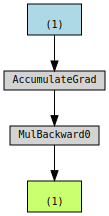

In [113]:
make_dot(out)

In [114]:
print(Model())

Model()


## Linear
```
torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)
Applies a linear transformation to the incoming data: y = xA^T + b

```


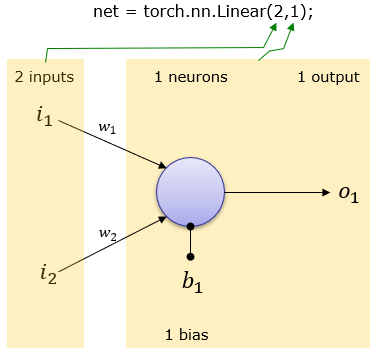

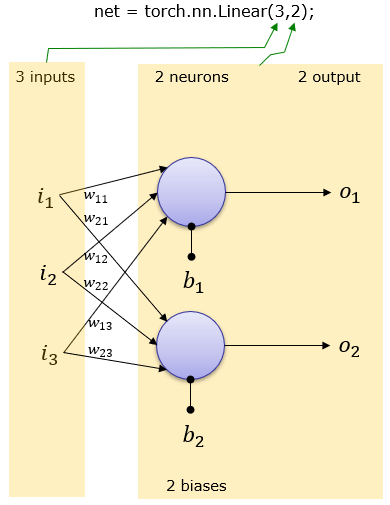

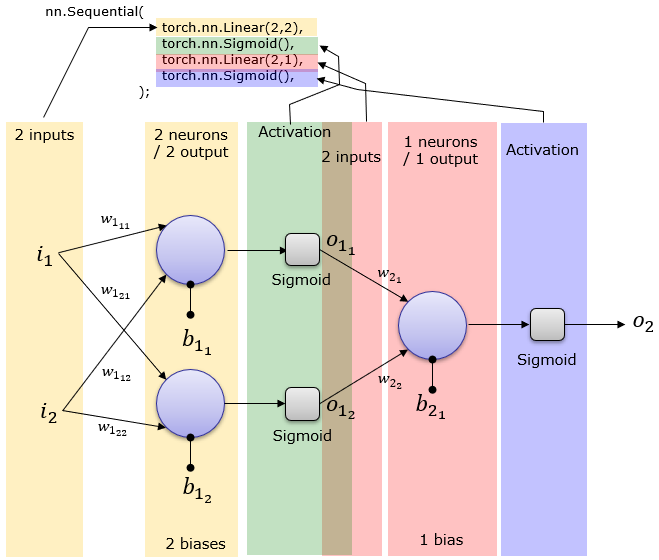

In [123]:
m = nn.Linear(3, 2)
m

Linear(in_features=3, out_features=2, bias=True)

In [124]:
m.weight

Parameter containing:
tensor([[ 0.0213,  0.2268, -0.3649],
        [-0.0137, -0.2471, -0.5226]], requires_grad=True)

In [125]:
m.bias

Parameter containing:
tensor([ 0.4732, -0.4329], requires_grad=True)

In [135]:
# Simple transformation
m = nn.Linear(1, 1, bias=False)
print(m.weight)
out = m(torch.tensor([0.2]))
print(out)

Parameter containing:
tensor([[0.7959]], requires_grad=True)
tensor([0.1592], grad_fn=<SqueezeBackward3>)


In [140]:
# Manupulate linear transformation weight
m = nn.Linear(1, 1, bias=False)
print(m.weight)

with torch.no_grad():
    m.weight[0][0] = torch.tensor([0.4])
print(m.weight)

# out = m(torch.tensor([0.2]))
# print(out)

Parameter containing:
tensor([[-0.2381]], requires_grad=True)
Parameter containing:
tensor([[0.4000]], requires_grad=True)


## convolution

```
torch.nn.Conv1d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None
```

In [ ]:
m = nn.Conv1d(1, 1, 2, stride=1)
with torch.no_grad():
    m.weight[[[0]]]= 4
    m.weight[[[1]]]= 5

m.weight

# input = torch.randn(2, 6, 50)
# output = m(input)
